# Data Exploration & Visualization
This notebook analyzes and visualizes delivery data to gain insights into delivery patterns, efficiency, and potential optimizations. The dataset contains information on delivery locations, travel distances, traffic conditions, and fuel costs.

Through various visualizations, we aim to:

* Understand the distribution of delivery distances and times.
* Analyze the impact of traffic conditions on delivery efficiency.
* Visualize delivery locations relative to the headquarters (HQ).
* Identify patterns that will assist in optimizing delivery routes.


These insights will serve as the foundation for the next step: clustering deliveries into optimized zones.












In [2]:
import pandas as pd

# Loading the dataset
df = pd.read_csv("monthly_deliveries.csv")

df

,Batch_ID,Car_ID,Order_ID,Dropoff_Lat,Dropoff_Lon,Time_of_Day,Traffic_Condition,Distance_km,Actual_Delivery_Time_Min,Fuel_Consumed_L,Fuel_Cost_TND
0,1,Car_1,1-1,36.814148,10.158456,11:17,Moderate Traffic,2.22,5.79,0.22,0.48
1,1,Car_1,1-2,36.785373,10.213686,11:57,Moderate Traffic,5.87,12.58,0.59,1.30
2,1,Car_1,1-3,36.836597,10.249003,11:47,Moderate Traffic,6.51,13.95,0.65,1.43
3,1,Car_1,1-4,36.855471,10.233147,11:28,Moderate Traffic,2.53,6.60,0.25,0.55
4,1,Car_1,1-5,36.896445,10.263521,11:25,Moderate Traffic,5.30,11.36,0.53,1.17
...,...,...,...,...,...,...,...,...,...,...,...
2274,80,Car_2,80-27,36.575055,10.016741,14:07,Moderate Traffic,3.50,9.13,0.35,0.77
2275,80,Car_2,80-28,36.553582,10.054221,15:41,Moderate Traffic,4.11,10.72,0.41,0.90
2276,80,Car_2,80-29,36.540166,10.109756,14:31,Moderate Traffic,5.18,11.10,0.52,1.14
2277,80,Car_2,80-30,36.518702,10.094426,13:11,Moderate Traffic,2.75,7.17,0.28,0.62


In [3]:
# Getting the dataset's info (columns, data types, missing values)
df.info()

# Checking for missing values
missing_values = df.isnull().sum()
print("\nMissing Values:\n", missing_values)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2279 entries, 0 to 2278
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Batch_ID                  2279 non-null   int64  
 1   Car_ID                    2279 non-null   object 
 2   Order_ID                  2279 non-null   object 
 3   Dropoff_Lat               2279 non-null   float64
 4   Dropoff_Lon               2279 non-null   float64
 5   Time_of_Day               2279 non-null   object 
 6   Traffic_Condition         2279 non-null   object 
 7   Distance_km               2279 non-null   float64
 8   Actual_Delivery_Time_Min  2279 non-null   float64
 9   Fuel_Consumed_L           2279 non-null   float64
 10  Fuel_Cost_TND             2279 non-null   float64
dtypes: float64(6), int64(1), object(4)
memory usage: 196.0+ KB

Missing Values:
 Batch_ID                    0
Car_ID                      0
Order_ID                    0
Dropof

Because the data is generated there are no missing values but in real life data normally has missing values that need to be adressed.

In [4]:
# Summary statistics of numerical columns
df.describe()

,Batch_ID,Dropoff_Lat,Dropoff_Lon,Distance_km,Actual_Delivery_Time_Min,Fuel_Consumed_L,Fuel_Cost_TND
count,2279.000000,2279.000000,2279.000000,2279.000000,2279.000000,2279.000000,2279.000000
mean,41.874506,36.823392,10.149168,5.395459,11.797086,0.565129,1.243190
std,24.010516,0.142792,0.227300,3.368360,5.380141,0.359652,0.791203
min,1.000000,36.371654,9.310469,1.000000,2.610000,0.100000,0.220000
25%,20.000000,36.736016,10.030479,2.900000,7.685000,0.300000,0.660000
50%,43.000000,36.821762,10.150597,4.750000,11.640000,0.490000,1.080000
75%,63.000000,36.902622,10.259578,7.105000,15.340000,0.740000,1.630000
max,80.000000,37.468364,10.859661,19.710000,31.120000,2.560000,5.630000


## Data Visualization

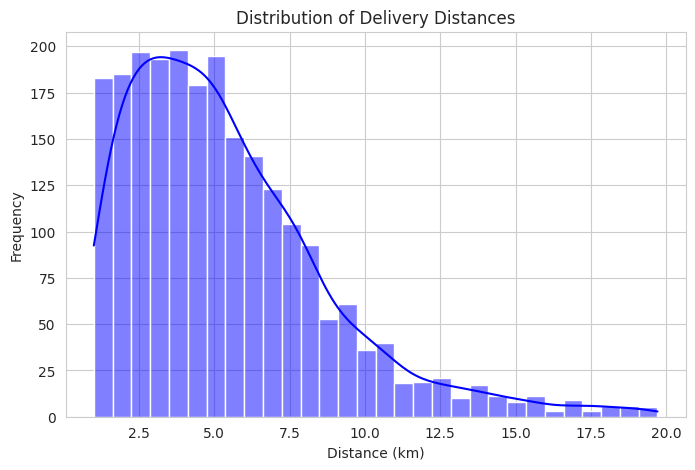

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set style
sns.set_style("whitegrid")

# Plot delivery distance distribution
plt.figure(figsize=(8, 5))
sns.histplot(df["Distance_km"], bins=30, kde=True, color="blue")
plt.title("Distribution of Delivery Distances")
plt.xlabel("Distance (km)")
plt.ylabel("Frequency")
plt.show()

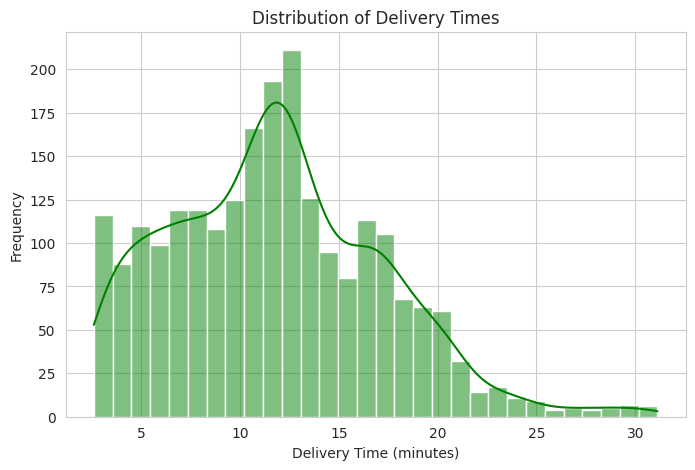

In [6]:
# Plot delivery time distribution
plt.figure(figsize=(8, 5))
sns.histplot(df["Actual_Delivery_Time_Min"], bins=30, kde=True, color="green")
plt.title("Distribution of Delivery Times")
plt.xlabel("Delivery Time (minutes)")
plt.ylabel("Frequency")
plt.show()


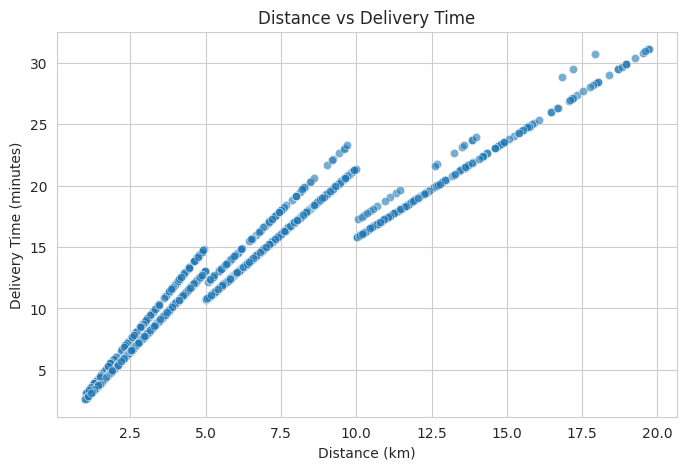

In [7]:
# Scatter plot of Distance vs Delivery Time
plt.figure(figsize=(8, 5))
sns.scatterplot(x=df["Distance_km"], y=df["Actual_Delivery_Time_Min"], alpha=0.6)
plt.title("Distance vs Delivery Time")
plt.xlabel("Distance (km)")
plt.ylabel("Delivery Time (minutes)")
plt.show()

This graph shows a step-like increase in delivery time as distance increases, indicating predefined speed tiers. Each segment likely represents different traffic conditions or road types.


<ipython-input-8-2d50ceefd554>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df["Traffic_Condition"], y=df["Actual_Delivery_Time_Min"], palette="pastel")


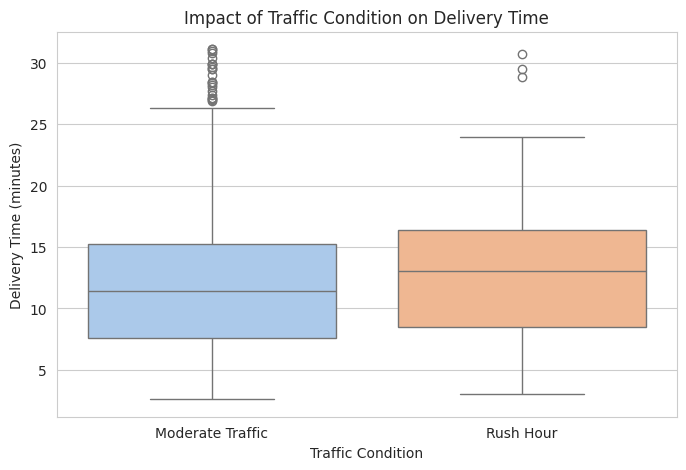

In [8]:
# Box plot of Delivery Time by Traffic Condition
plt.figure(figsize=(8, 5))
sns.boxplot(x=df["Traffic_Condition"], y=df["Actual_Delivery_Time_Min"], palette="pastel")
plt.title("Impact of Traffic Condition on Delivery Time")
plt.xlabel("Traffic Condition")
plt.ylabel("Delivery Time (minutes)")
plt.show()

This boxplot shows the impact of traffic conditions on delivery time. Rush hour slightly increases median delivery time, but both traffic conditions have similar variability. Unexpected long delays occur even in moderate traffic, possibly due to congestion or route inefficiencies.

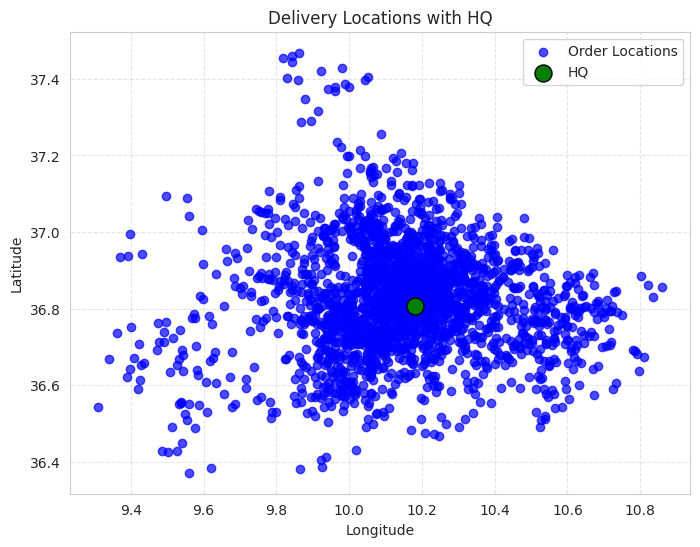

In [12]:
import matplotlib.pyplot as plt

# Define HQ location
hq_lat, hq_lon = 36.8065, 10.1815
# Create the plot
plt.figure(figsize=(8, 6))

# Plot order locations (drop-off points)
plt.scatter(df["Dropoff_Lon"], df["Dropoff_Lat"], color='blue', label='Order Locations', alpha=0.7)

# Plot HQ location
plt.scatter(hq_lon, hq_lat, color='green', s=150, label='HQ', edgecolors='black')

# Formatting
plt.title("Delivery Locations with HQ")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)

# Show the map representation
plt.show()


This map visualizes delivery locations with HQ at the center (green). Most deliveries cluster near HQ, with some spread across a wider area. High-density regions suggest a need for clustering to optimize delivery routes.